### Sobre el DataSet

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

1. Importamos librerías

In [ ]:
###############################################################################
# IMPORTACIÓN DE LIBRERÍAS
###############################################################################
import pandas as pd
import numpy as np

# Preprocesamiento y división de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Podríamos usar "OneHotEncoder", pero usaremos get_dummies de pandas.

# Modelo SVM y métricas
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Para mostrar la matriz de confusión de manera gráfica
from sklearn.metrics import ConfusionMatrixDisplay

# PCA para reducción de dimensionalidad
from sklearn.decomposition import PCA

# Visualización
import matplotlib.pyplot as plt

# Librería opcional para gráficos estadísticos (countplot, heatmap, etc.)
import seaborn as sns


2. Cargamos el DataSet y lo limpiamos

In [ ]:
###############################################################################
# CARGA DEL DATASET Y EXPLORACIÓN INICIAL
###############################################################################
# Ajusta la ruta al CSV según tu entorno local, si es necesario
df = pd.read_csv("mushrooms.csv")

print("Dimensiones originales del dataset:", df.shape)
df.head()


Dimensiones originales del dataset: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
###############################################################################
# LIMPIEZA DE DATOS (ELIMINAR FILAS CON '?')
###############################################################################
# Muchas columnas pueden contener el carácter '?' indicando "desconocido".
# Aquí, eliminamos cualquier fila que tenga al menos un '?'.

print("Número de filas antes de limpiar: ", df.shape[0])

df = df[~df.eq('?').any(axis=1)]  # Nos quedamos solo con filas sin '?'

print("Número de filas después de limpiar: ", df.shape[0])
print("Dimensiones tras limpieza:", df.shape)


Número de filas antes de limpiar:  8124
Número de filas después de limpiar:  5644
Dimensiones tras limpieza: (5644, 23)


3. Preparamos las variables

In [ ]:
###############################################################################
# PREPARAR VARIABLES X, y (Codificación)
###############################################################################
# 1) 'y' será la variable de clase: 'class' (e=0, p=1)
# 2) 'X' serán el resto de columnas, con One-Hot Encoding

# --- 1. Codificación de la variable objetivo ---
y_raw = df['class'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)  # "e"->0, "p"->1

# --- 2. Eliminar la columna 'class' de X ---
X_cat = df.drop('class', axis=1)

# --- 3. Convertir variables categóricas con get_dummies ---
X_encoded = pd.get_dummies(X_cat)

# Chequeo
print("Dimensiones de X_encoded:", X_encoded.shape)
print("Tamaño de y:", y.shape)


Dimensiones de X_encoded: (5644, 98)
Tamaño de y: (5644,)


4. Separación de registros de entrenamiento y testeoy escalamiento

In [ ]:
###############################################################################
# DIVISIÓN EN ENTRENAMIENTO Y TEST + ESCALADO
###############################################################################
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Escalamos los datos para mejorar el rendimiento del SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Tamaño del conjunto de entrenamiento:", X_train_scaled.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", X_test_scaled.shape, y_test.shape)


Tamaño del conjunto de entrenamiento: (4515, 98) (4515,)
Tamaño del conjunto de prueba: (1129, 98) (1129,)


5. Entrenamiento del Modelo y Evaluación

Matriz de confusión (valores numéricos):
[[698   0]
 [  0 431]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       698
           1       1.00      1.00      1.00       431

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



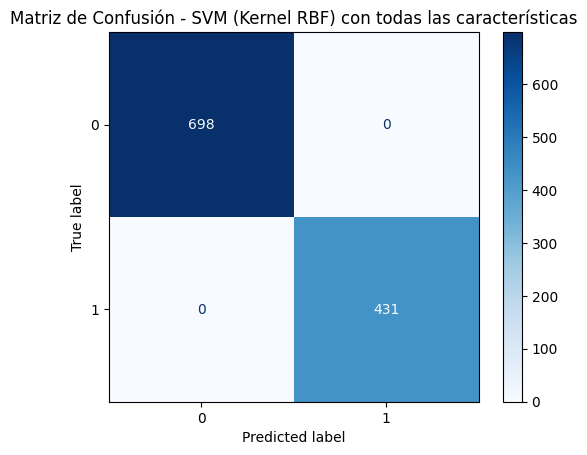

In [ ]:
###############################################################################
# ENTRENAMIENTO Y EVALUACIÓN DE UN SVM
###############################################################################
# Entrenamos un SVC con kernel RBF por defecto.
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# Predicción en test
y_pred = model.predict(X_test_scaled)

# Matriz de confusión y reporte
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión (valores numéricos):")
print(cm)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostramos la matriz de confusión de forma gráfica
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap="Blues")
plt.title("Matriz de Confusión - SVM (Kernel RBF) con todas las características")
plt.show()


6. Análisis de Correlaciones


Top 10 correlaciones con la clase:
class                         1.000000
odor_f                        0.794472
spore-print-color_h           0.794472
odor_n                        0.709304
stalk-surface-above-ring_k    0.706930
ring-type_l                   0.694419
stalk-surface-below-ring_k    0.694419
stalk-shape_e                 0.592446
stalk-shape_t                 0.592446
stalk-surface-above-ring_s    0.582121
Name: class, dtype: float64

Las dos características más correlacionadas con 'class' son: ['odor_f', 'spore-print-color_h']

Matriz de Covarianza:
              cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
cap-shape_b     0.050337    -0.000038    -0.022908    -0.000339    -0.000301   
cap-shape_c    -0.000038     0.000708    -0.000305    -0.000005    -0.000004   
cap-shape_f    -0.022908    -0.000305     0.245269    -0.002749    -0.002444   
cap-shape_k    -0.000339    -0.000005    -0.002749     0.006339    -0.000036   
cap-shape_s    -0.000301  

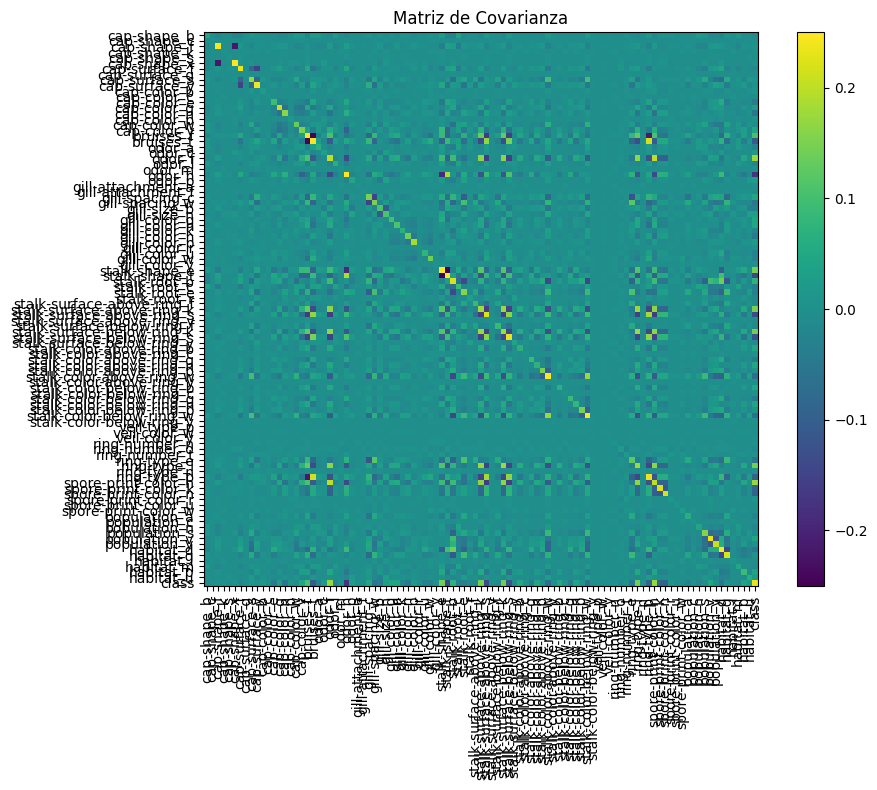

In [ ]:
###############################################################################
# ANÁLISIS DE CORRELACIONES Y SELECCIÓN DE LAS 2 VARIABLES MÁS IMPORTANTES
###############################################################################
# Dado que tenemos variables One-Hot, calculamos correlación con 'class'.

df_corr = X_encoded.copy()
df_corr['class'] = y

correlation_matrix = df_corr.corr()  # corr() calcula Pearson por defecto

# Extraemos las correlaciones absolutas con la columna 'class'
corr_with_class = correlation_matrix['class'].abs().sort_values(ascending=False)

print("\nTop 10 correlaciones con la clase:")
print(corr_with_class.head(10))

top_2_features = corr_with_class.index[1:3]  # omitimos 'class' (index[0]) y tomamos 2 features 
# Más adelante probamos con 2:4 por ejemplo
print("\nLas dos características más correlacionadas con 'class' son:", list(top_2_features))

###############################################################################
# DIBUJO DE LA MATRIZ DE COVARIANZA (aunque no vamos a ver demasiado)
###############################################################################
# Calculamos la matriz de covarianza a partir del mismo DataFrame (df_corr)
cov_matrix = df_corr.cov()

# Podemos imprimirla en texto para revisión
print("\nMatriz de Covarianza:\n", cov_matrix)

# Ahora la graficamos con matplotlib
plt.figure(figsize=(10, 8))         # Definimos el tamaño de la figura
plt.imshow(cov_matrix, interpolation='nearest')  # Mostramos los valores de covarianza
plt.title("Matriz de Covarianza")
plt.colorbar()                      # Barra de colores que indica la escala de valores
# Colocamos los nombres de las variables en los ejes X e Y
plt.xticks(range(len(cov_matrix.columns)), cov_matrix.columns, rotation=90)
plt.yticks(range(len(cov_matrix.columns)), cov_matrix.columns)
plt.tight_layout()                  # Ajustamos para que no se encimen las etiquetas
plt.show()


7. Entrenar SVM solo con las 2 más correlacionadas

Matriz de confusión (2 características):
[[698   0]
 [119 312]]

Reporte de clasificación (2 características):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       698
           1       1.00      0.72      0.84       431

    accuracy                           0.89      1129
   macro avg       0.93      0.86      0.88      1129
weighted avg       0.91      0.89      0.89      1129



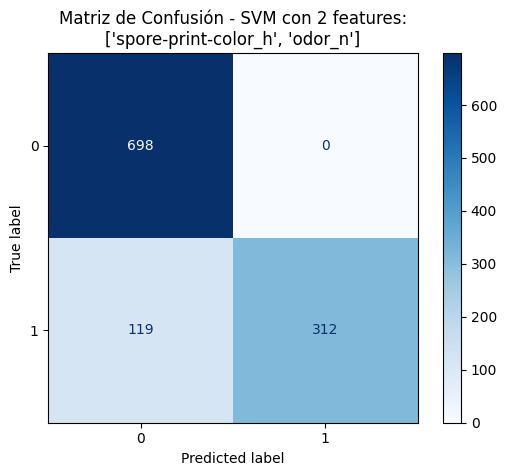

In [ ]:
###############################################################################
# ENTRENAR SVM USANDO SOLO LAS 2 CARACTERÍSTICAS MÁS CORRELACIONADAS
###############################################################################
# 1) Extraemos las columnas elegidas
X_selected = X_encoded[list(top_2_features)]

# 2) Dividimos en train/test
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Escalamos
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled  = scaler_sel.transform(X_test_sel)

# 4) Entrenamos el SVM
model_sel = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_sel.fit(X_train_sel_scaled, y_train_sel)

# 5) Evaluación
y_pred_sel = model_sel.predict(X_test_sel_scaled)
cm_sel = confusion_matrix(y_test_sel, y_pred_sel)

print("Matriz de confusión (2 características):")
print(cm_sel)
print("\nReporte de clasificación (2 características):")
print(classification_report(y_test_sel, y_pred_sel))

ConfusionMatrixDisplay.from_estimator(model_sel, X_test_sel_scaled, y_test_sel, cmap="Blues")
plt.title(f"Matriz de Confusión - SVM con 2 features:\n{list(top_2_features)}")
plt.show()


8. Visualización de la Forntera de Decisión en 2D

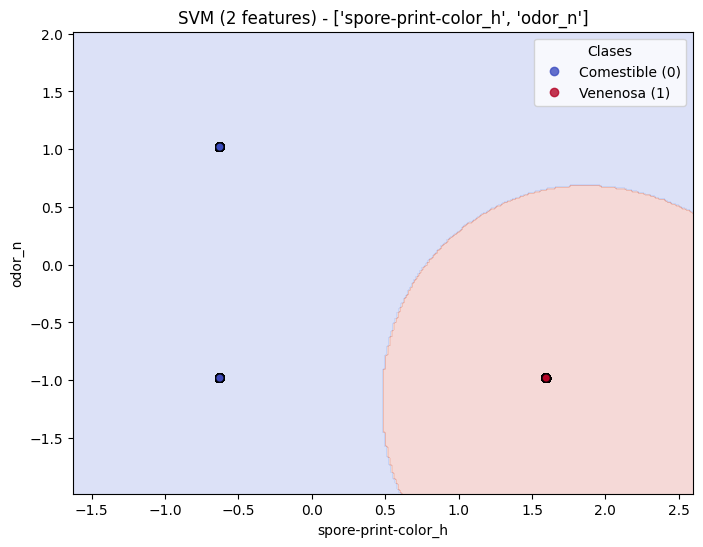

In [ ]:
###############################################################################
# VISUALIZACIÓN DE LA FRONTERA DE DECISIÓN EN 2D
###############################################################################
# Representamos cómo SVM separa en el plano de las 2 características más correlacionadas

# 1) Rango de valores
x_min, x_max = X_train_sel_scaled[:, 0].min() - 1, X_train_sel_scaled[:, 0].max() + 1
y_min, y_max = X_train_sel_scaled[:, 1].min() - 1, X_train_sel_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# 2) Predicción en la malla
Z = model_sel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3) Gráfica
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")  # fondo con la región de cada clase

# Dibujamos los puntos de entrenamiento
scatter = plt.scatter(
    X_train_sel_scaled[:, 0], 
    X_train_sel_scaled[:, 1],
    c=y_train_sel, cmap="coolwarm", edgecolors='k', alpha=0.8
)

# Añadimos leyenda para distinguir las clases
handles, _ = scatter.legend_elements()
plt.legend(handles, ["Comestible (0)", "Venenosa (1)"], title="Clases")

plt.title(f"SVM (2 features) - {list(top_2_features)}")
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.show()


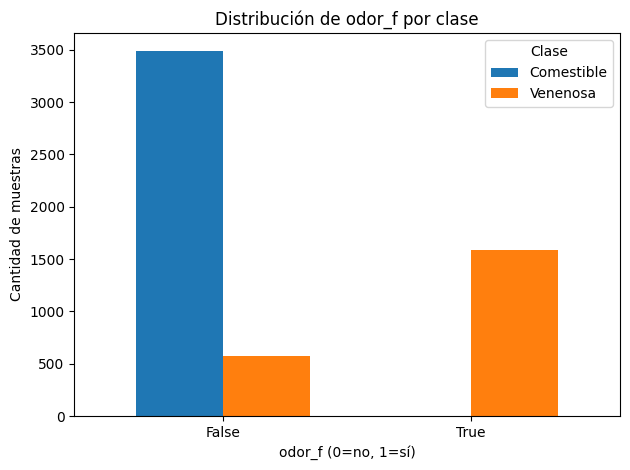

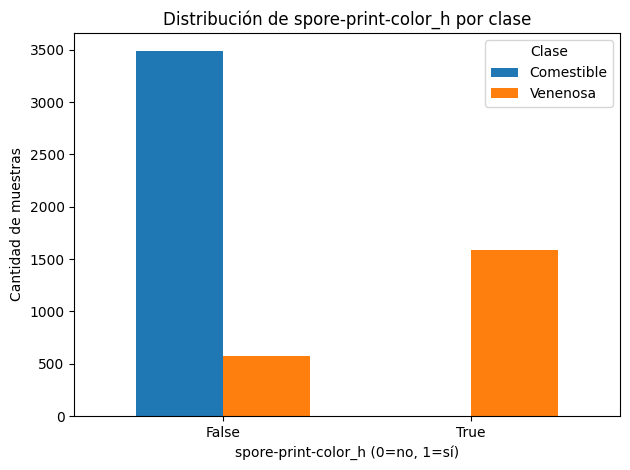

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# POr EJEMPLO: Usamos dos columnas One-Hot del dataset de setas
columns_to_plot = ['odor_f', 'spore-print-color_h']

# Creamos un DataFrame de trabajo con solo esas columnas
df_plot = X_encoded[columns_to_plot].copy()

# Convertimos la clase de 0/1 a texto (opcional)
df_plot['class'] = np.where(y == 0, 'Comestible', 'Venenosa')

# Recorremos cada columna y hacemos un gráfico de barras agrupadas
for col in columns_to_plot:
    # Agrupamos por valor de la columna (0/1) y por clase
    grouped = df_plot.groupby([col, 'class']).size().unstack(fill_value=0)
    # grouped tendrá un índice de 0 y 1, y columnas "Comestible", "Venenosa"

    # Hacemos un gráfico de barras agrupadas
    grouped.plot(kind='bar', width=0.7)
    plt.title(f"Distribución de {col} por clase")
    plt.xlabel(f"{col} (0=no, 1=sí)")
    plt.ylabel("Cantidad de muestras")
    plt.legend(title="Clase")
    plt.xticks(rotation=0)  # Para que las etiquetas (0,1) queden horizontales
    plt.tight_layout()      # Ajusta el espacio para no cortar texto

    plt.show()


Matriz de confusión (valores numéricos):
[[696   2]
 [103 328]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       698
           1       0.99      0.76      0.86       431

    accuracy                           0.91      1129
   macro avg       0.93      0.88      0.90      1129
weighted avg       0.92      0.91      0.90      1129



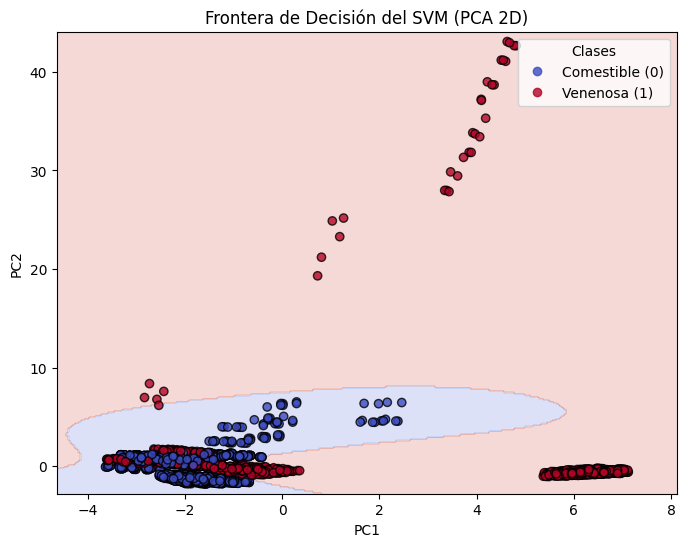

In [ ]:
###############################################################################
# PCA PARA VISUALIZACIÓN 
###############################################################################

# Importamos la clase PCA de scikit-learn para la reducción de dimensionalidad.
pca = PCA(n_components=2)  # Indicamos que queremos reducir a 2 componentes principales.

# Ajustamos el PCA con los datos de entrenamiento (X_train_scaled) y transformamos dichos datos.
X_train_pca = pca.fit_transform(X_train_scaled)
# Transformamos los datos de prueba (X_test_scaled) usando el mismo PCA.
X_test_pca  = pca.transform(X_test_scaled)

# Definimos el modelo SVM con kernel 'rbf'.
model_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# Entrenamos el modelo SVM en el espacio reducido (2D) obtenido por PCA.
model_pca.fit(X_train_pca, y_train)

# Predicción en test
y_pred = model_pca.predict(X_test_pca)

# Matriz de confusión y reporte
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión (valores numéricos):")
print(cm)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Definimos los límites del plano (2D) para graficar la frontera de decisión.
# Tomamos el mínimo y máximo de la primera componente principal (columna 0).
x_min_p, x_max_p = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
# Tomamos el mínimo y máximo de la segunda componente principal (columna 1).
y_min_p, y_max_p = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Creamos una malla de puntos en el rango definido por x_min_p, x_max_p e y_min_p, y_max_p.
xx_p, yy_p = np.meshgrid(
    np.linspace(x_min_p, x_max_p, 300),
    np.linspace(y_min_p, y_max_p, 300)
)

# Predecimos la clase para cada punto de la malla con el modelo entrenado en 2D.
Z_p = model_pca.predict(np.c_[xx_p.ravel(), yy_p.ravel()])
# Damos la forma adecuada a Z_p para poder usarla en la función de contornos.
Z_p = Z_p.reshape(xx_p.shape)

# Configuramos el tamaño de la figura para visualizar la frontera de decisión.
plt.figure(figsize=(8, 6))
# Dibujamos los contornos (frontera de decisión) en la malla usando la predicción Z_p.
plt.contourf(xx_p, yy_p, Z_p, alpha=0.2, cmap="coolwarm")

# Hacemos un scatter plot de los datos transformados por PCA.
scatter_pca = plt.scatter(
    X_train_pca[:, 0],  # Eje x: primera componente principal
    X_train_pca[:, 1],  # Eje y: segunda componente principal
    c=y_train,          # Usamos las etiquetas como colores
    cmap="coolwarm",    # Mapa de color
    edgecolors='k',
    alpha=0.8
)

# Obtenemos los handles para la leyenda y asignamos las etiquetas correspondientes.
handles_pca, _ = scatter_pca.legend_elements()
plt.legend(handles_pca, ["Comestible (0)", "Venenosa (1)"], title="Clases")

# Títulos y etiquetas de ejes.
plt.title("Frontera de Decisión del SVM (PCA 2D)")
plt.xlabel("PC1")  # Eje x: Componente Principal 1
plt.ylabel("PC2")  # Eje y: Componente Principal 2
# Mostramos la figura.
plt.show()

